In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df = pd.read_excel('TA9_sorted_light.xlsx')

In [30]:
pd.options.display.min_rows=50

In [31]:
df.head()

,Time,TA09W,TA09Pin,TA09Pout,TA09Q,TA09Gh,TA09Gs,TA09Gr,TA09Gsw,TA09Th,TA09Ts,TA09Tsw
0,2017-12-31 01:00:00,34.434,131.21405,6.84004,18.743577,265.679934,231.907723,33.772210,213.47315,549.21429,239.981883,224.40297
1,2017-12-31 02:00:00,34.020,130.90822,6.70779,18.782844,261.809739,227.966777,33.842963,216.66152,547.08997,235.759720,223.29211
2,2017-12-31 03:00:00,33.969,131.16739,6.78159,19.137283,266.708087,232.226496,34.481591,221.24001,540.98462,233.732518,223.10010
3,2017-12-31 04:00:00,34.328,130.42202,6.73770,19.055169,259.383771,225.050134,34.333637,222.17330,550.27759,237.977532,222.36714
4,2017-12-31 05:00:00,34.378,131.64667,6.83037,19.630309,266.564516,231.194590,35.369926,226.78918,547.20074,235.784472,223.15752


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5158 entries, 0 to 5157
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      5158 non-null   object 
 1   TA09W     5158 non-null   float64
 2   TA09Pin   5158 non-null   float64
 3   TA09Pout  5158 non-null   float64
 4   TA09Q     5158 non-null   float64
 5   TA09Gh    5158 non-null   float64
 6   TA09Gs    5158 non-null   float64
 7   TA09Gr    5158 non-null   float64
 8   TA09Gsw   5158 non-null   float64
 9   TA09Th    5158 non-null   float64
 10  TA09Ts    5158 non-null   float64
 11  TA09Tsw   5158 non-null   float64
dtypes: float64(11), object(1)
memory usage: 483.7+ KB


In [33]:
df['Time'] = df['Time'].apply(lambda x: x.replace('.', ''))   

df['Time'] = df['Time'].apply(lambda x: x.replace(':', ''))   

df['Time'] = df['Time'].apply(lambda x: x.replace('-', ''))   

df['Time'] = df['Time'].apply(lambda x: x.replace(' ', ''))   



In [34]:
def mask_time(year,month,day,time):
    month_correct = '{:0>2}'.format(month)
    day_correct = '{:0>2}'.format(day)
    time_correct = '{:0>2}'.format(time)
    time_correct = '{:0<6}'.format(time_correct)
    return f'{year}'+month_correct+day_correct+time_correct

In [35]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 82em; }</style>"))

Распределения показателя TA09W по месяцам


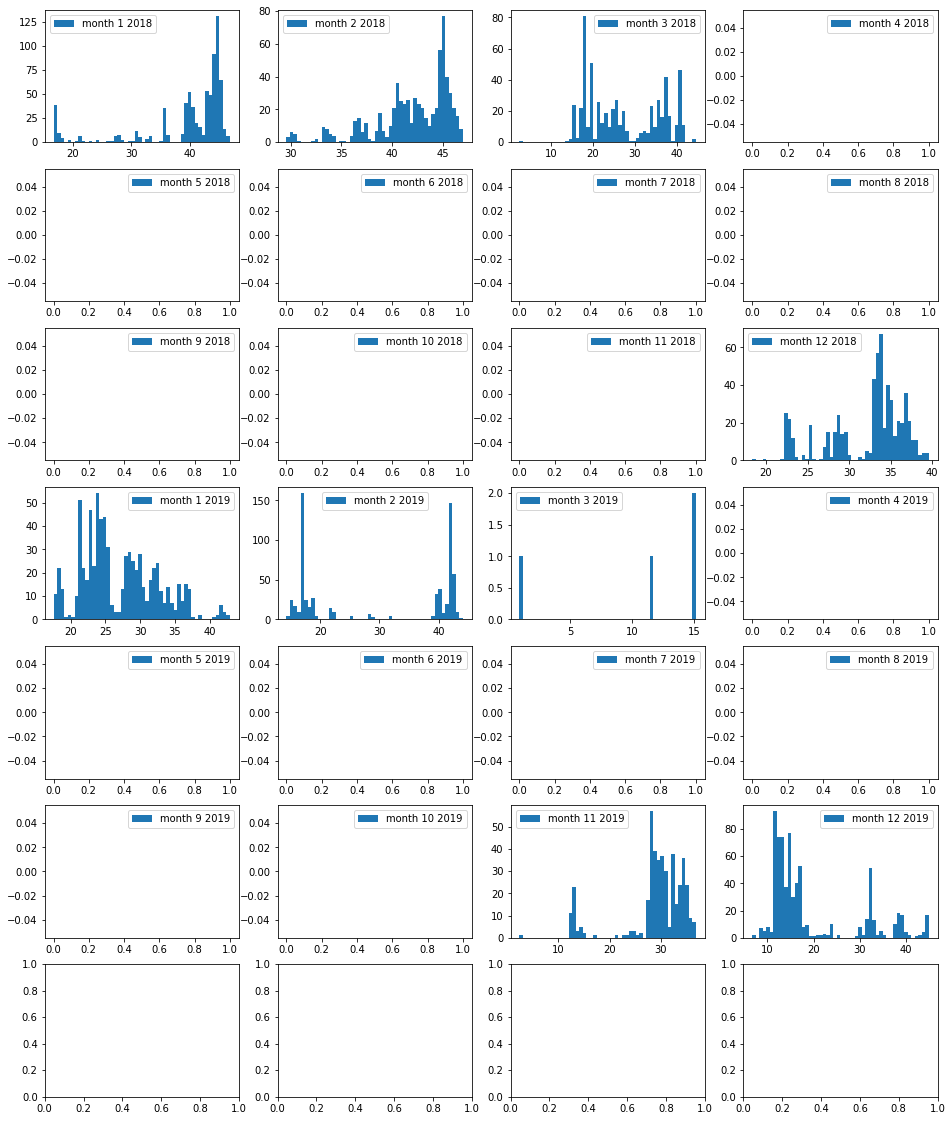

Распределения показателя TA09Pin по месяцам


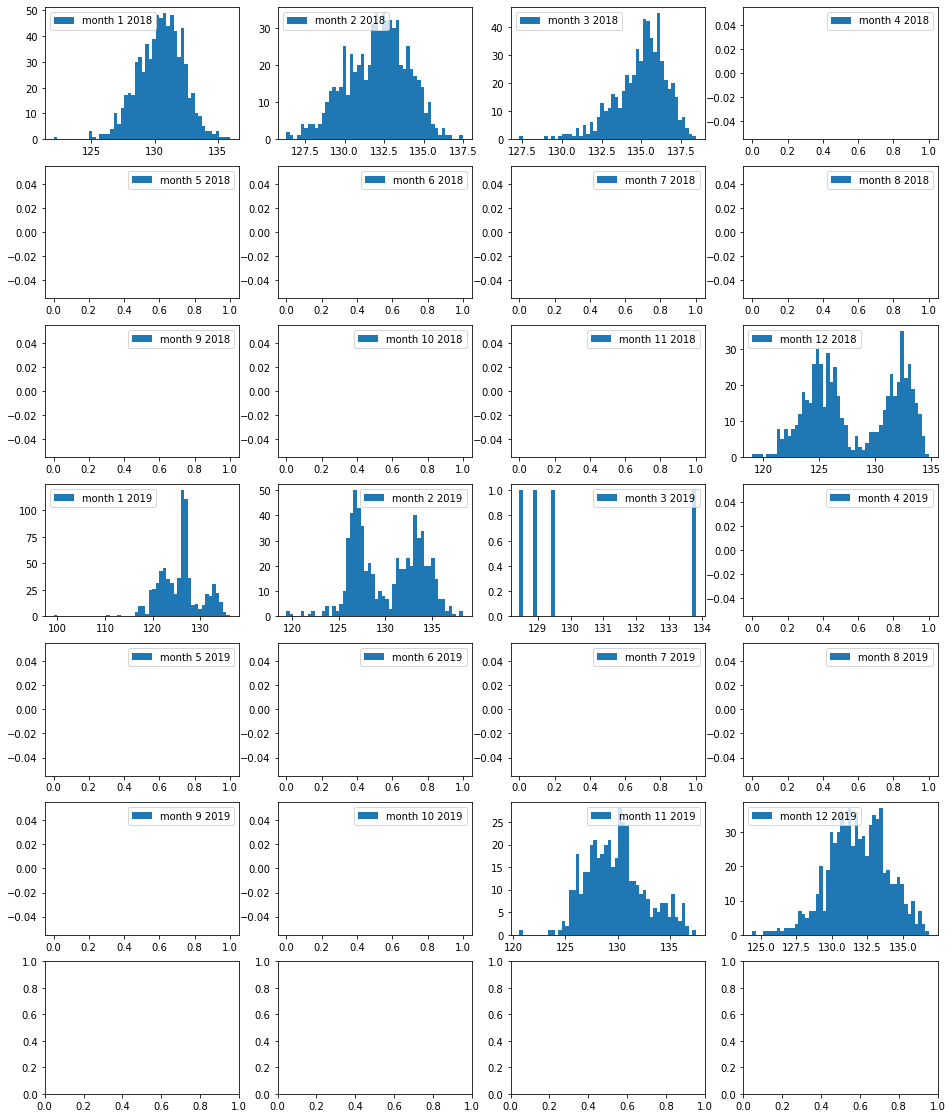

Распределения показателя TA09Pout по месяцам


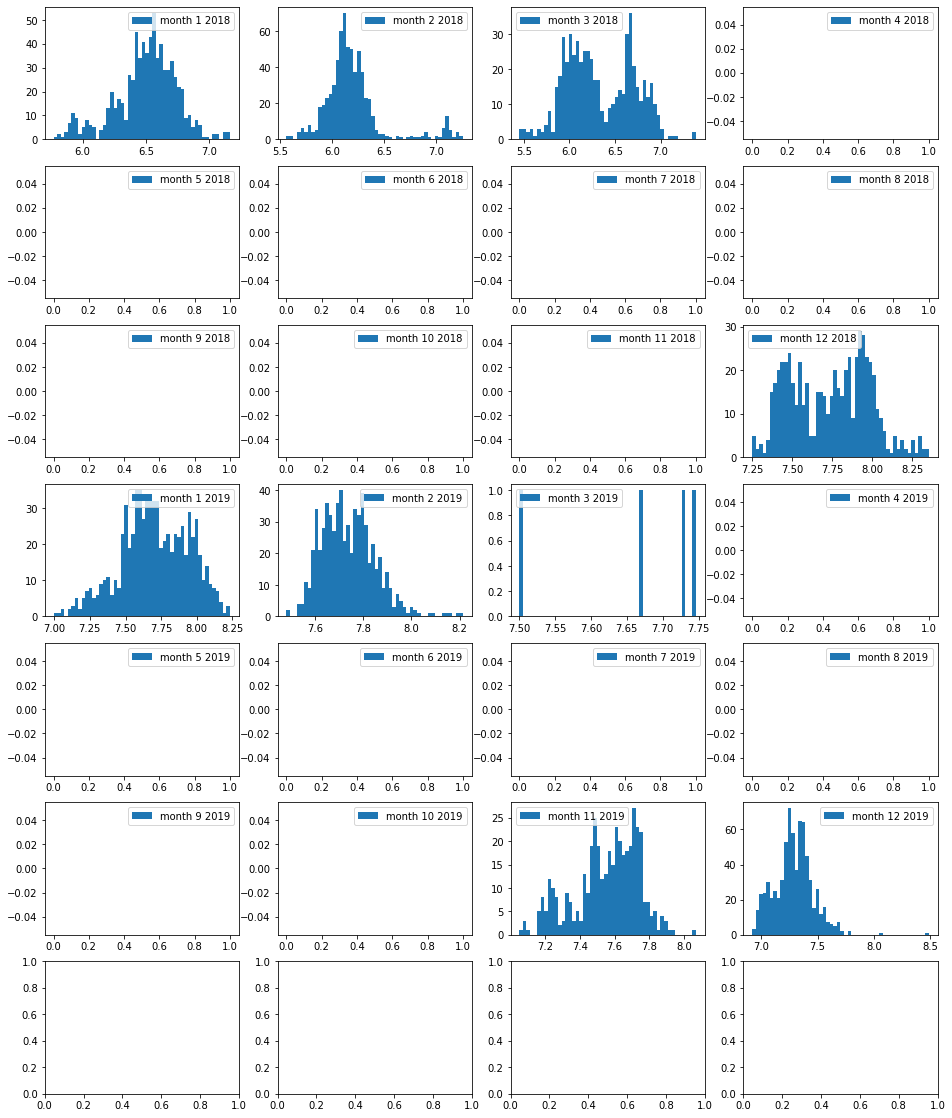

Распределения показателя TA09Q по месяцам


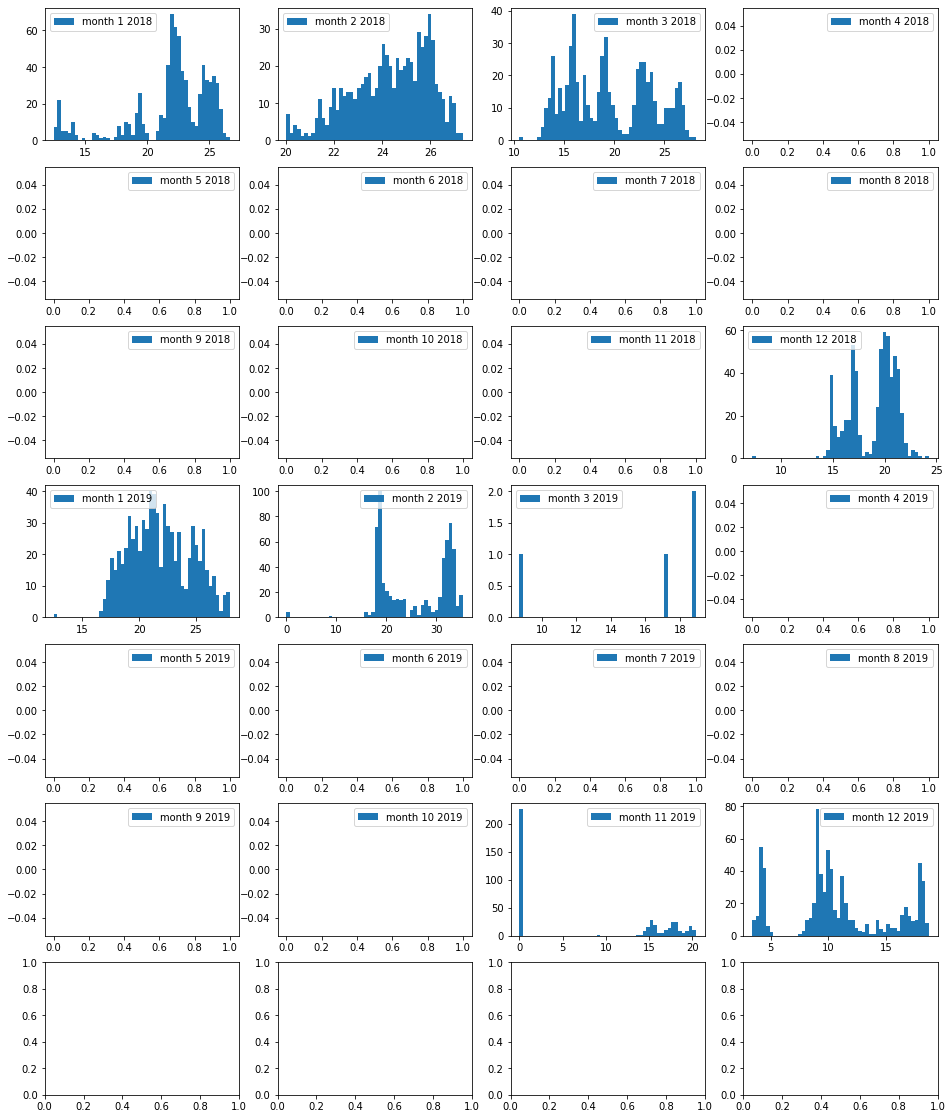

Распределения показателя TA09Gh по месяцам


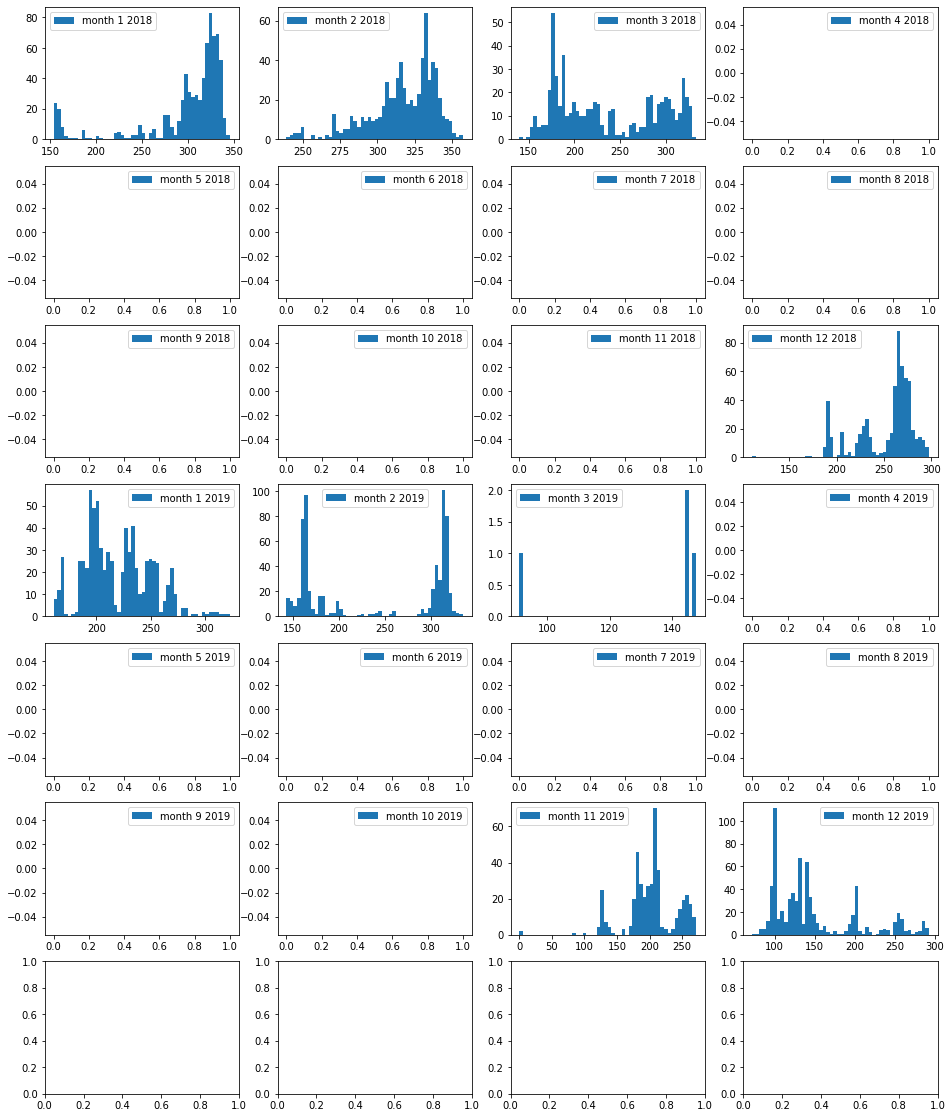

Распределения показателя TA09Gs по месяцам


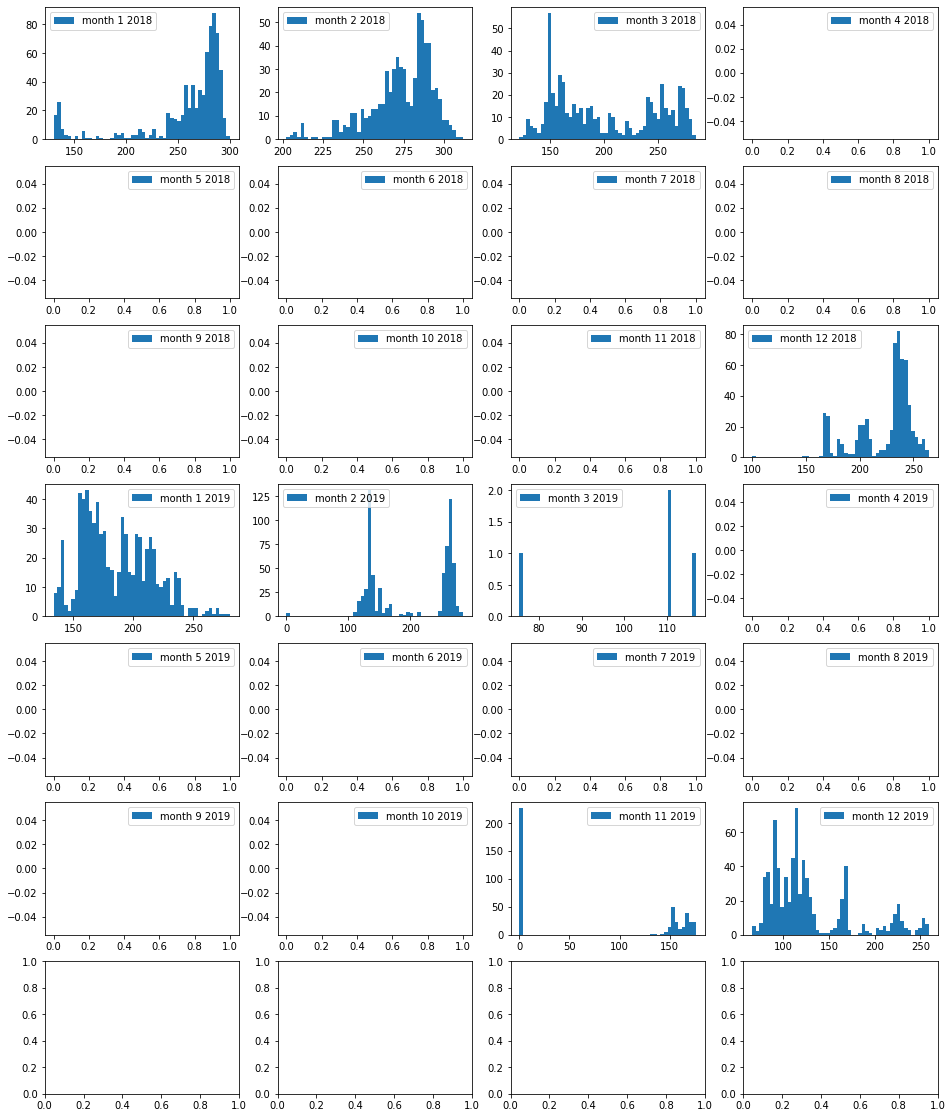

Распределения показателя TA09Gr по месяцам


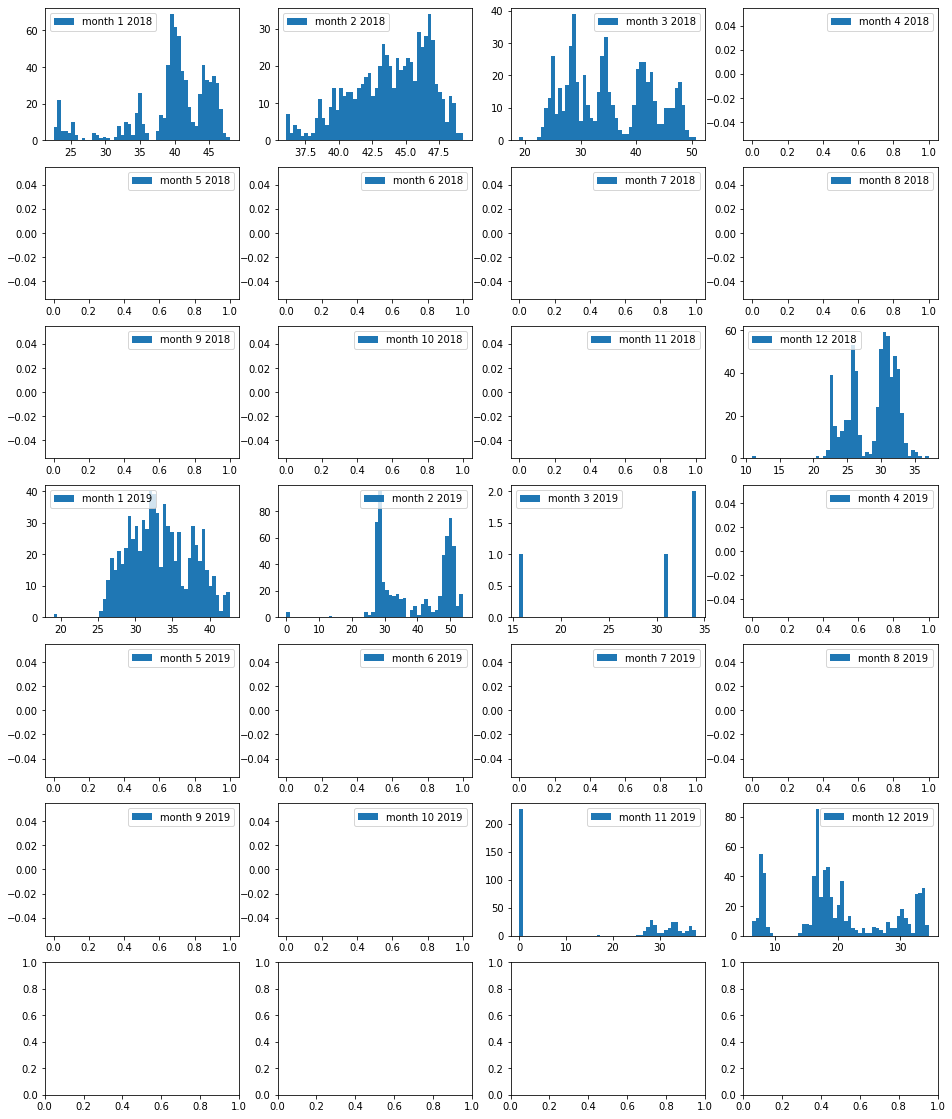

Распределения показателя TA09Gsw по месяцам


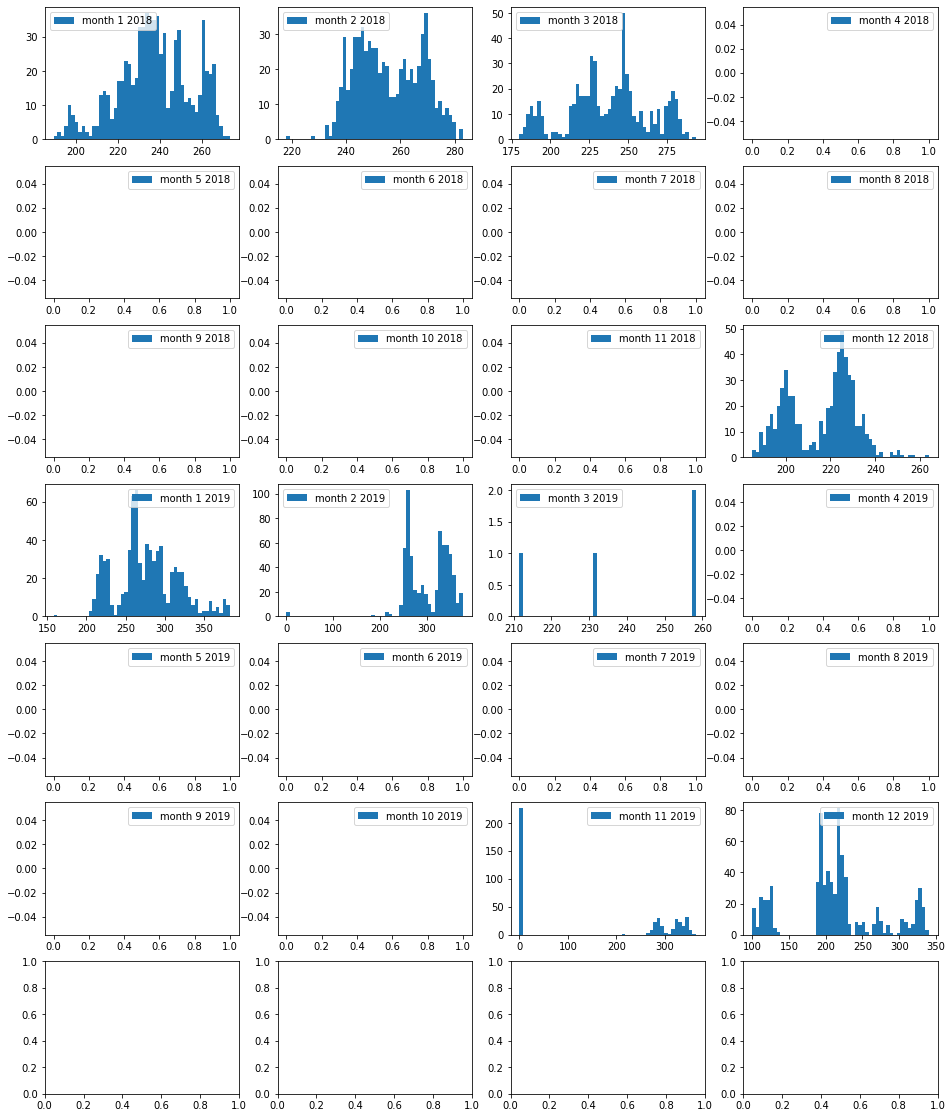

Распределения показателя TA09Th по месяцам


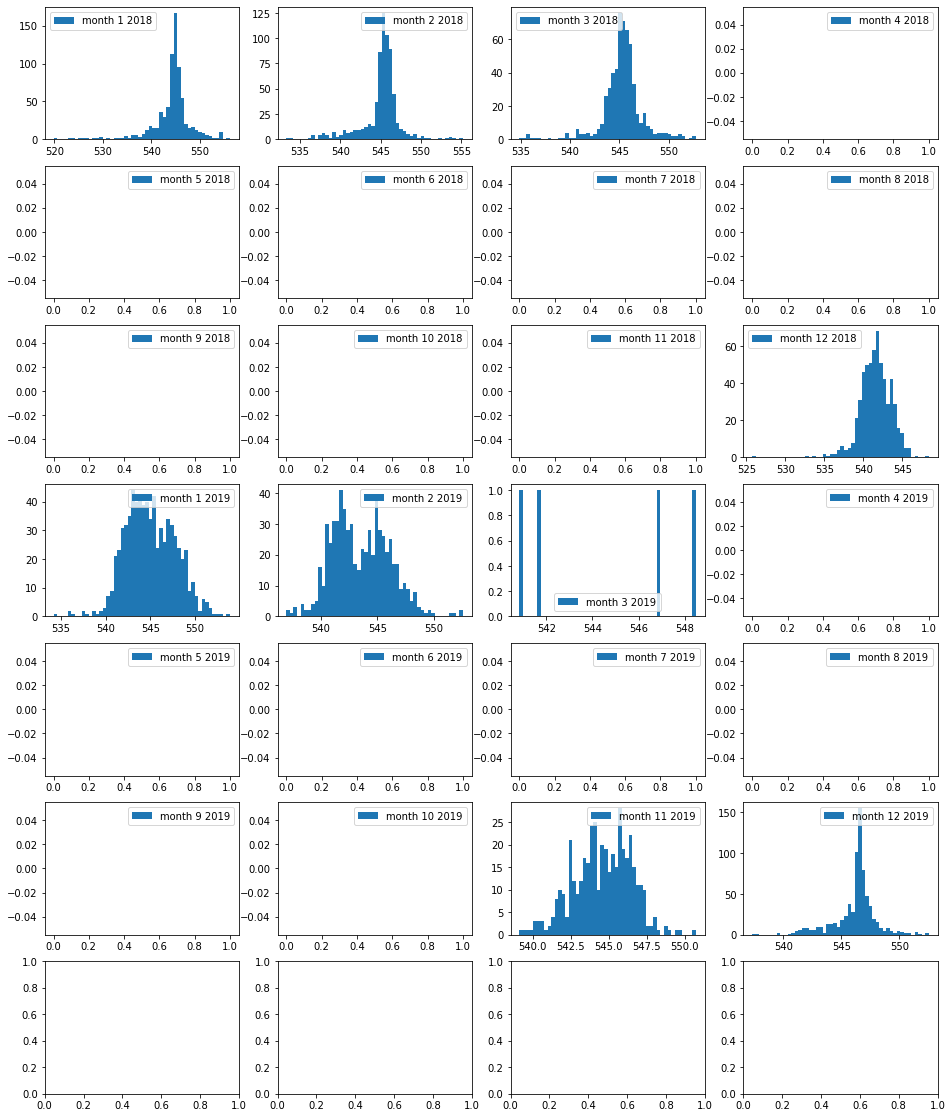

Распределения показателя TA09Ts по месяцам


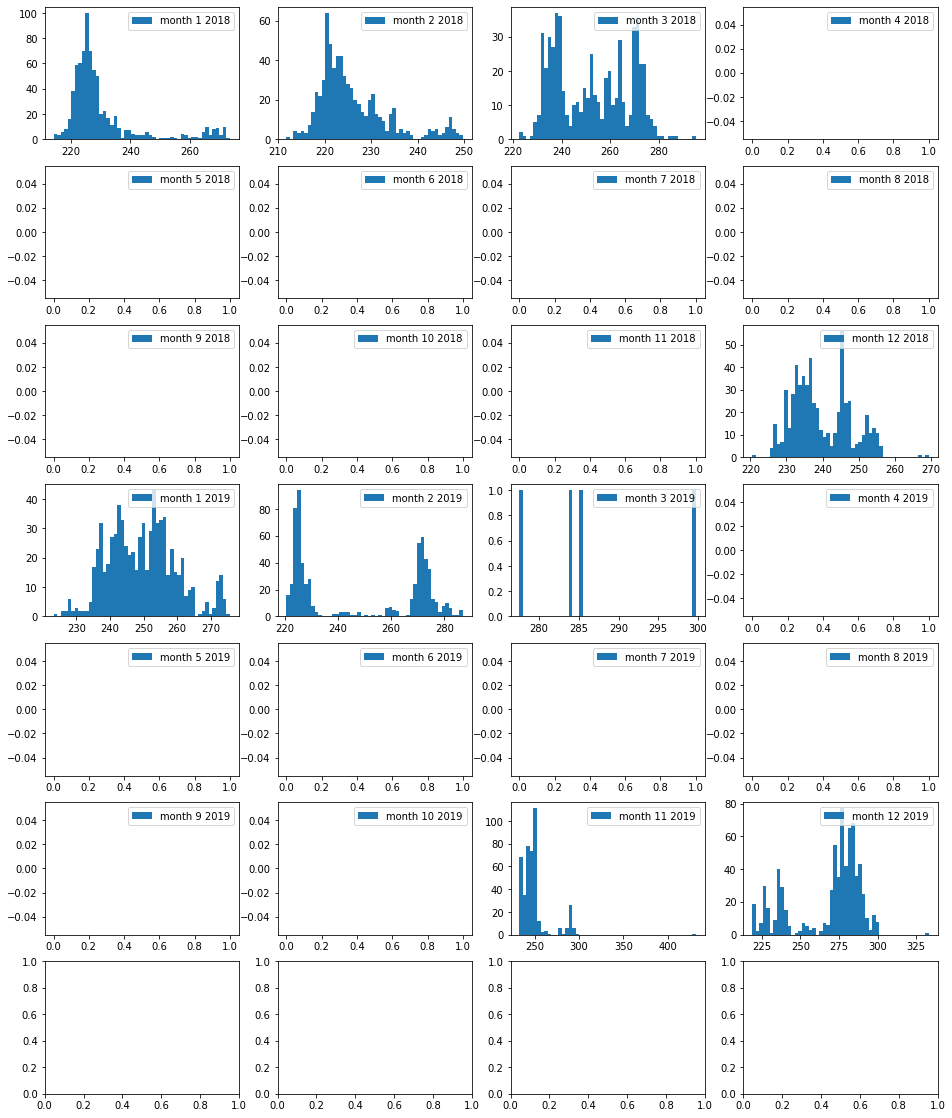

Распределения показателя TA09Tsw по месяцам


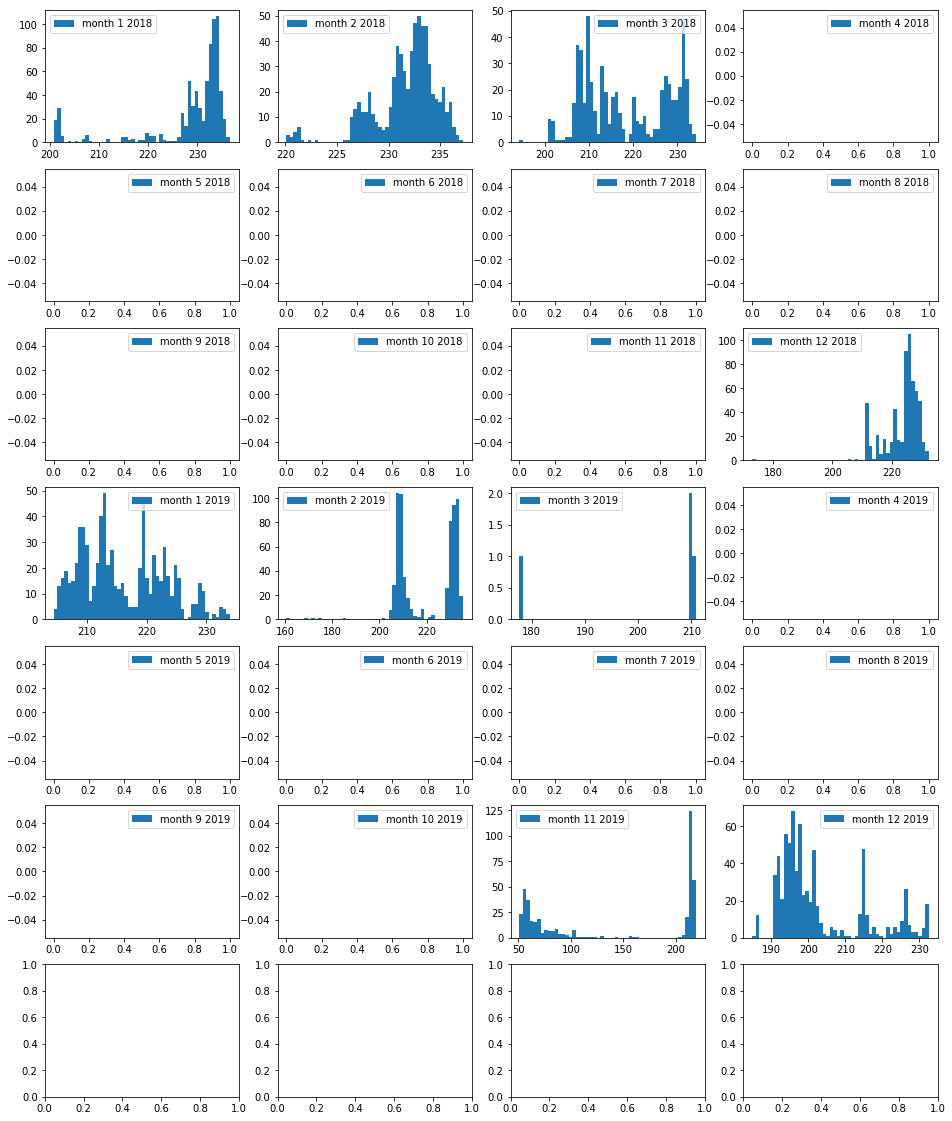

In [36]:
for col in df.columns[1:]:
    iterator=0
    print(f"Распределения показателя {col} по месяцам")
    fig,axes=plt.subplots(7,4)
    fig.set_figheight(20)
    fig.set_figwidth(16)
    year=2018
    month=1
    for j in range(2018,2020):
        year=j
        for i in range(1,13):
            month=i
            df_month= df[(df['Time'] <= mask_time(year,month,31,23)) & (df['Time'] >= mask_time(year,month,1,0))] 
          
            axes[iterator//4,iterator%4].hist(df_month[col], label= "month "+str(month)+" "+str(year), bins = 50)
            axes[iterator//4,iterator%4].legend()
            iterator+=1
    plt.show()       


Распределения показателя TA09Gr по дням в течение 1го месяца 2018


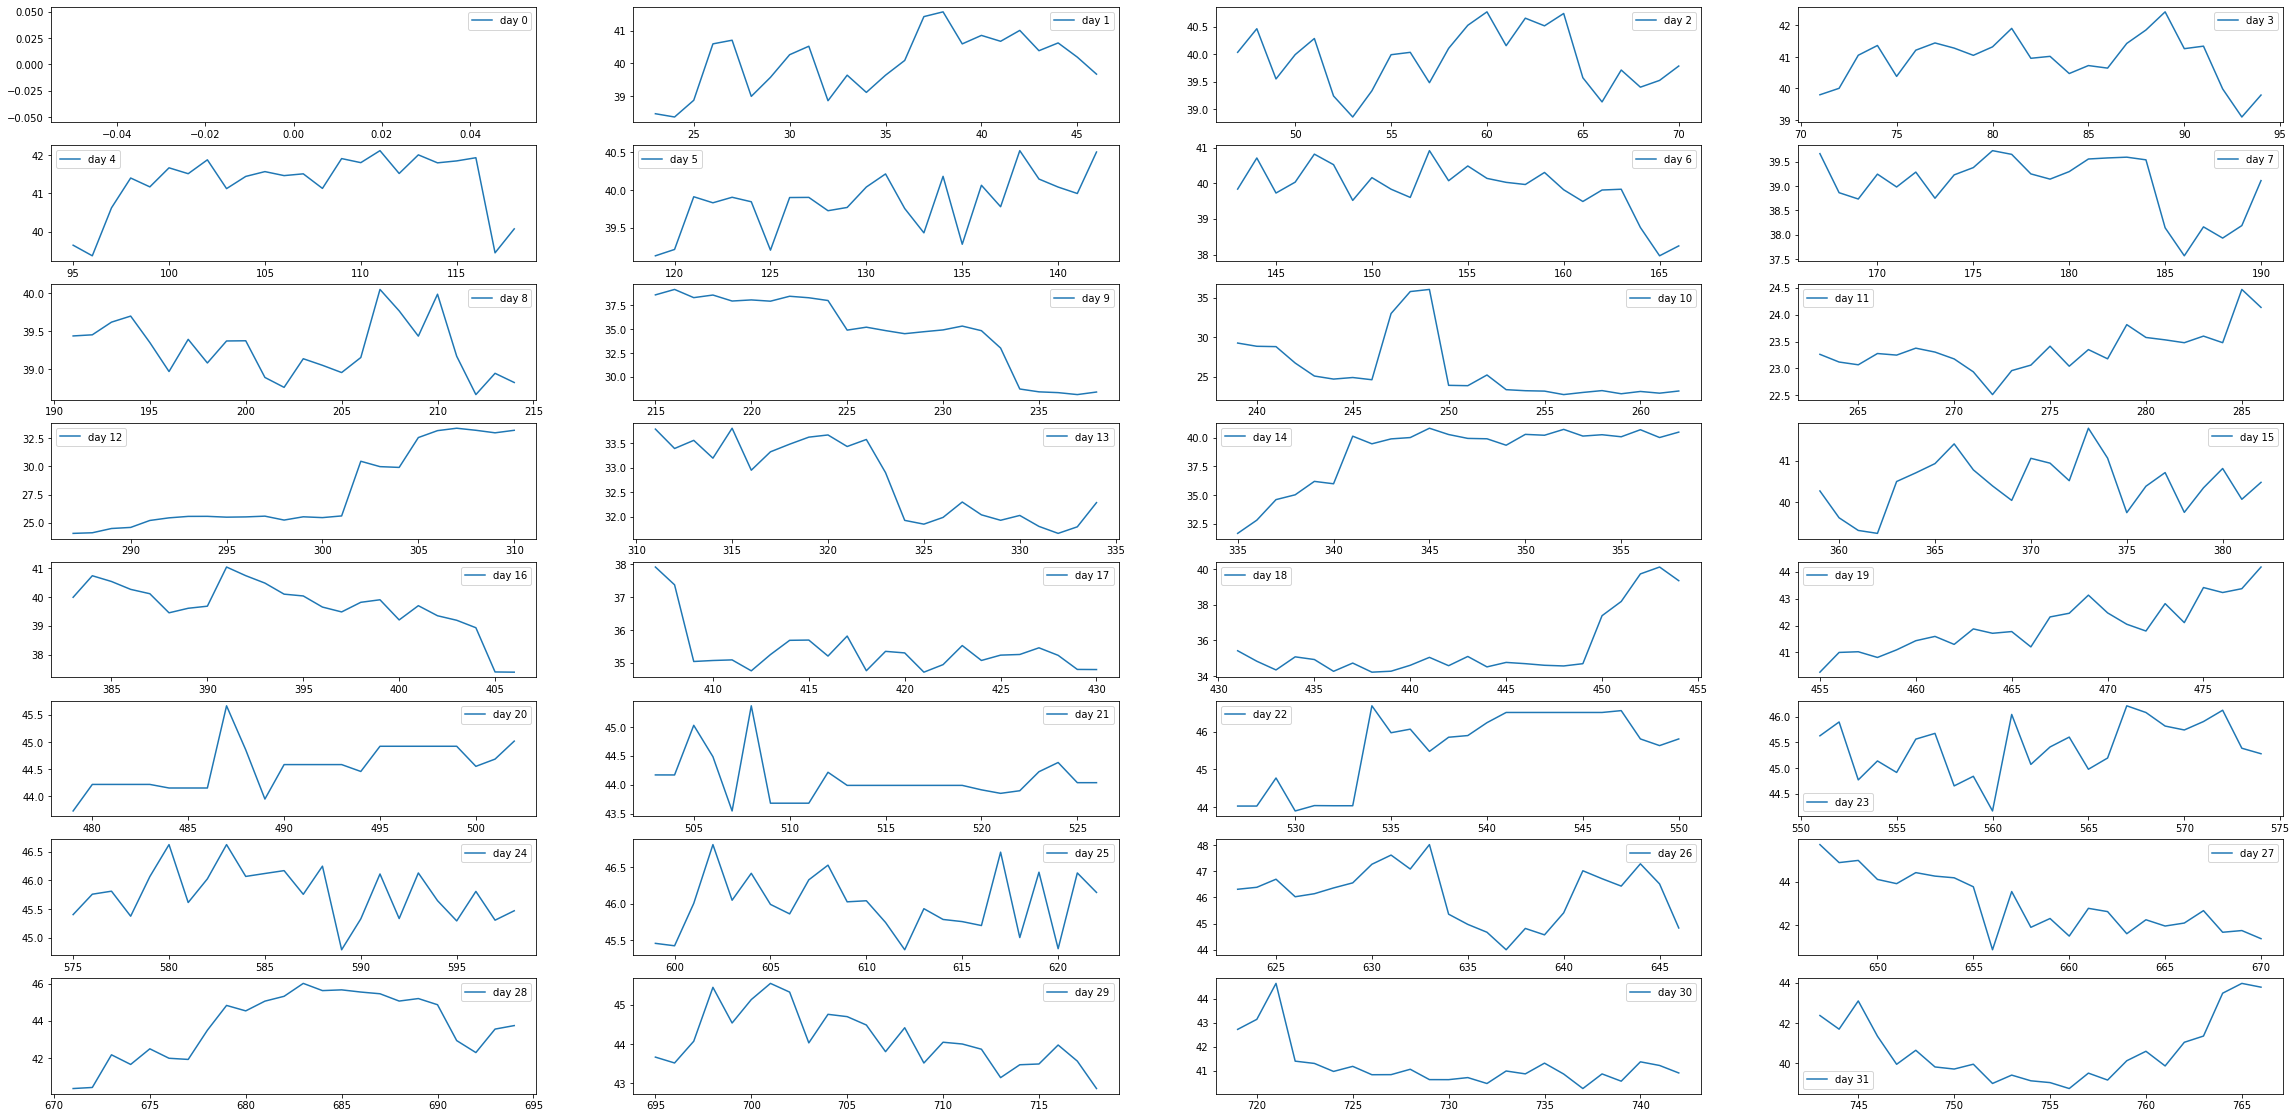

In [37]:
year=2018
month=1
for col in df.columns[7:8]:
    iterator=0
    print(f"Распределения показателя {col} по дням в течение 1го месяца 2018")
    fig,axes=plt.subplots(8,4)
    fig.set_figheight(20)
    fig.set_figwidth(40)

    for i in range(32):
        day=i
        df_day= df[(df['Time'] <= mask_time(year,month,day,31)) & (df['Time'] >= mask_time(year,month,day,0))] 
        axes[i//4,i%4].plot(df_day[col], label= "day "+str(day))
        axes[i//4,i%4].legend(fontsize=10)
        iterator+=1
    plt.show()   

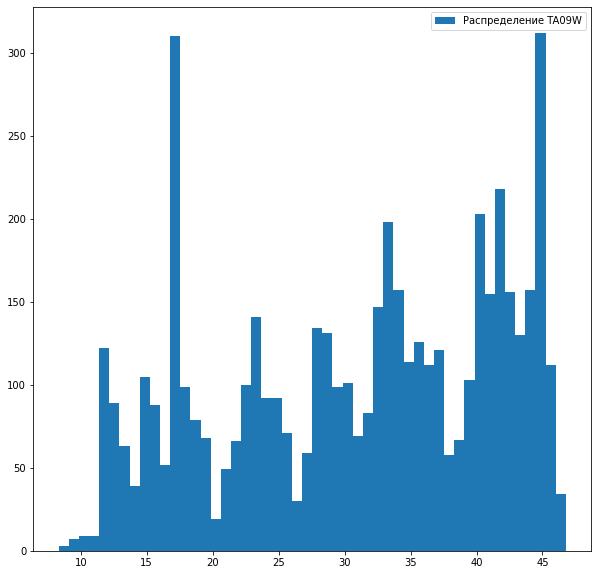

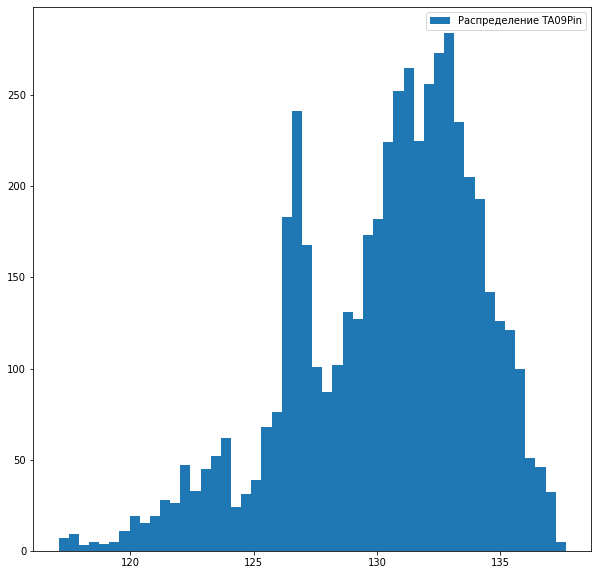

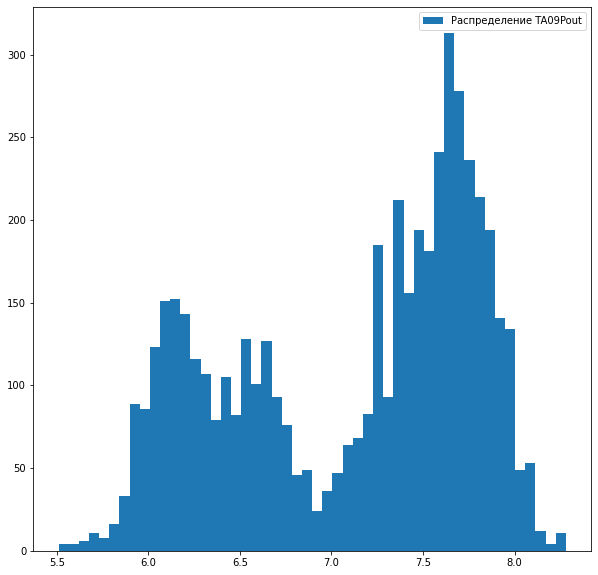

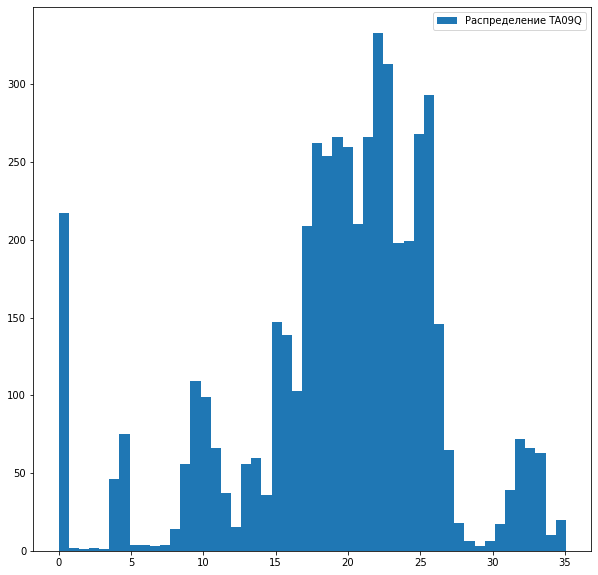

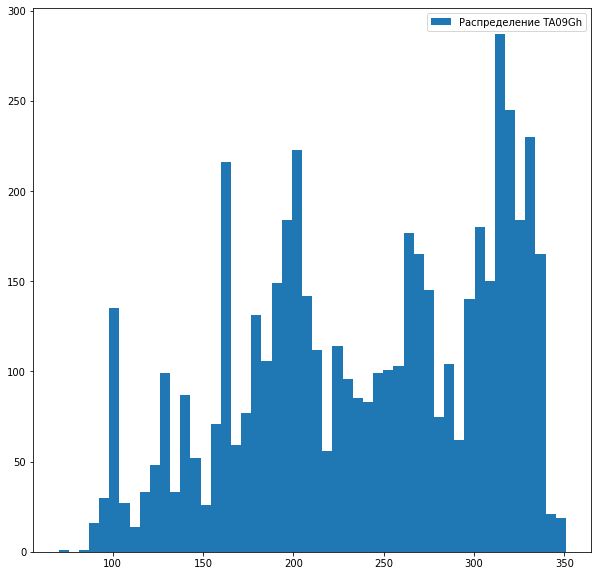

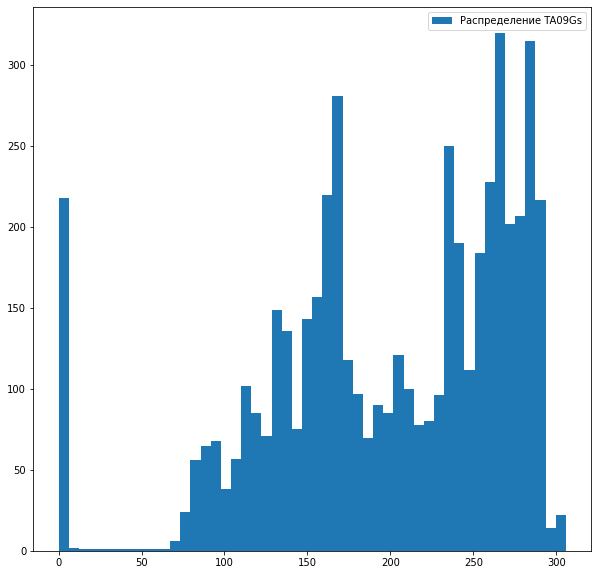

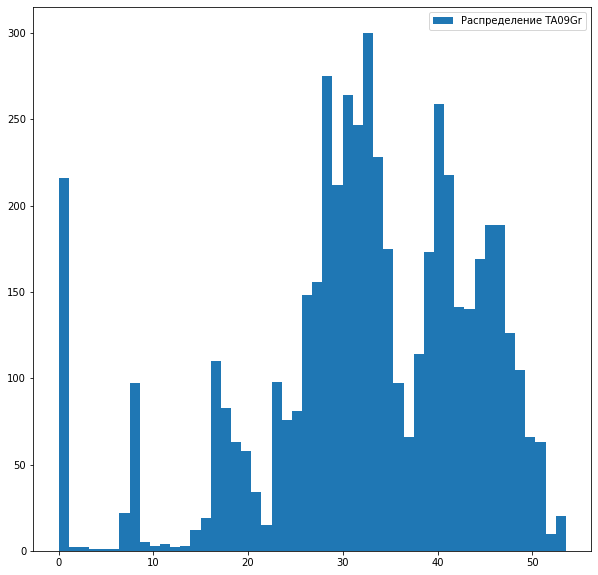

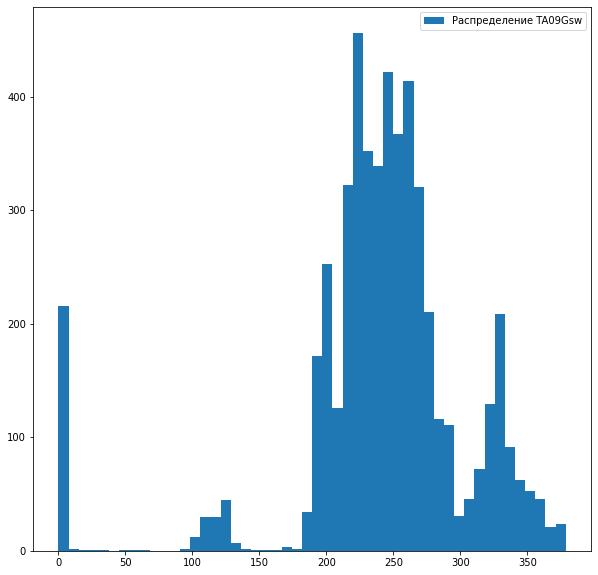

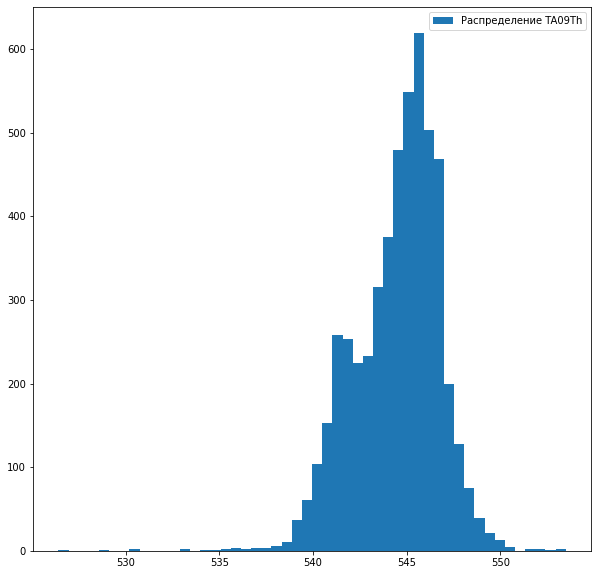

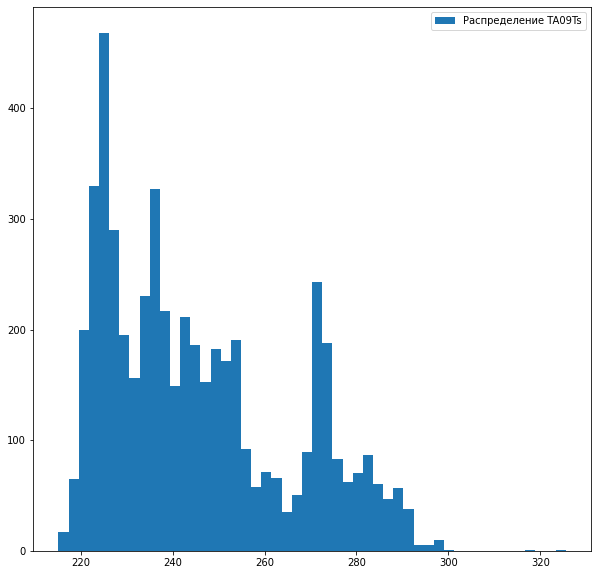

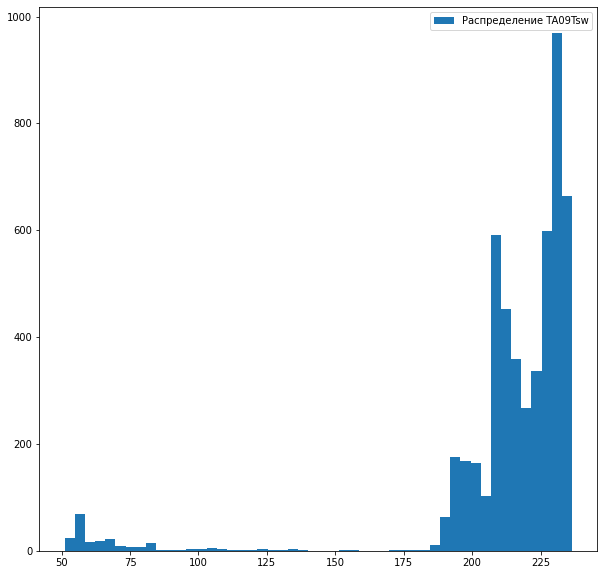

In [12]:
for col in df.columns[1:]:
    #print(f"Распределения показателя {col}")
    fig,axes=plt.subplots(1,1)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    
    axes.hist(df[col], label= f"Распределение {col}", bins = 50)
    axes.legend()
    plt.show()       
